# ОШИБКИ I И II РОДА С ТОЧКИ ЗРЕНИЯ КЛАССИФИКАЦИИ

H0 : Пациент xi не болеет диабетом yi=0.
H1: Пациент xi болеет диабетом yi=1.
Тогда у нас есть два случая, в которых мы можем допустить ошибку:

Ошибка I (первого) рода (aplha-ошибка): отклонение нулевой гипотезы, когда она на самом деле верна, или ложноположительный результат. То есть мы предсказали, что пациент болен диабетом, хотя это не так.
Ошибка II (второго) рода (beta-ошибка): принятие нулевой гипотезы, когда она на самом деле ложна, или ложноотрицательный результат. То есть мы предсказали, что пациент здоров, хотя на самом деле он болен диабетом.

Примечание. Как вы можете понять, в диагностических задачах для нас критичнее ошибка II рода. Последствия будут более серьёзными, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

# МЕТРИКИ КЛАССИФИКАЦИИ

Мы случайным образом выбрали десять пациентов из нашей таблицы и моделью log_reg_full предсказали для них ответы:

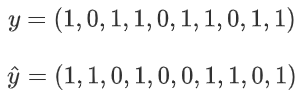

Все метрики, которые мы рассмотрим, основаны на матрице ошибок. С неё мы и начнём наш разбор.

## Матрица ошибок (confusion matrix) 

Матрица ошибок (confusion matrix) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.


Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта к одному из классов. Тогда каждая ячейка матрицы ошибок соответствует количеству объектов, попавших в одну из следующих четырёх категорий:

* Истинно положительные (True Positive, TP) - обозначены моделью как класс 1 (y^=1) и действительно пренадлижащие этому классу(y=1)

* Ложноположительные (False Positive, FP) - y^=1, y=0 (ошибка I рода)

* Истинно отрицательные (True Negative, TN) - y^=0, y=0

* Ложноотрицательные (False Negative, FN) - y^=0, y=1 (ошибка II рода)

Для большей наглядности представим следующую ситуацию: у нас есть множество наблюдений двух классов (класс 1 — круги, класс 0 — квадраты). Пусть мы нарисовали некоторый круг и условились, что все объекты, лежащие в этом круге, мы будем считать классом 1, а объекты вне круга — классом 0. Тогда мы получим следующую картину:


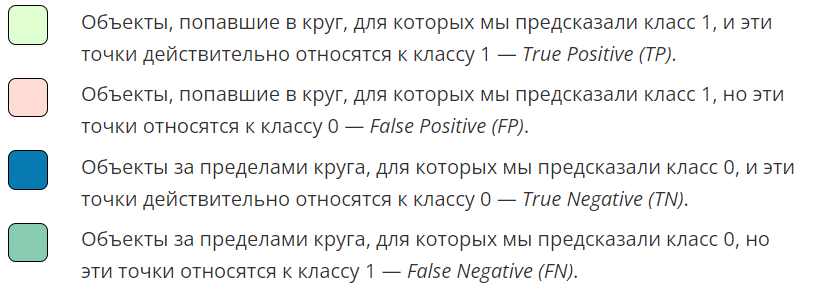

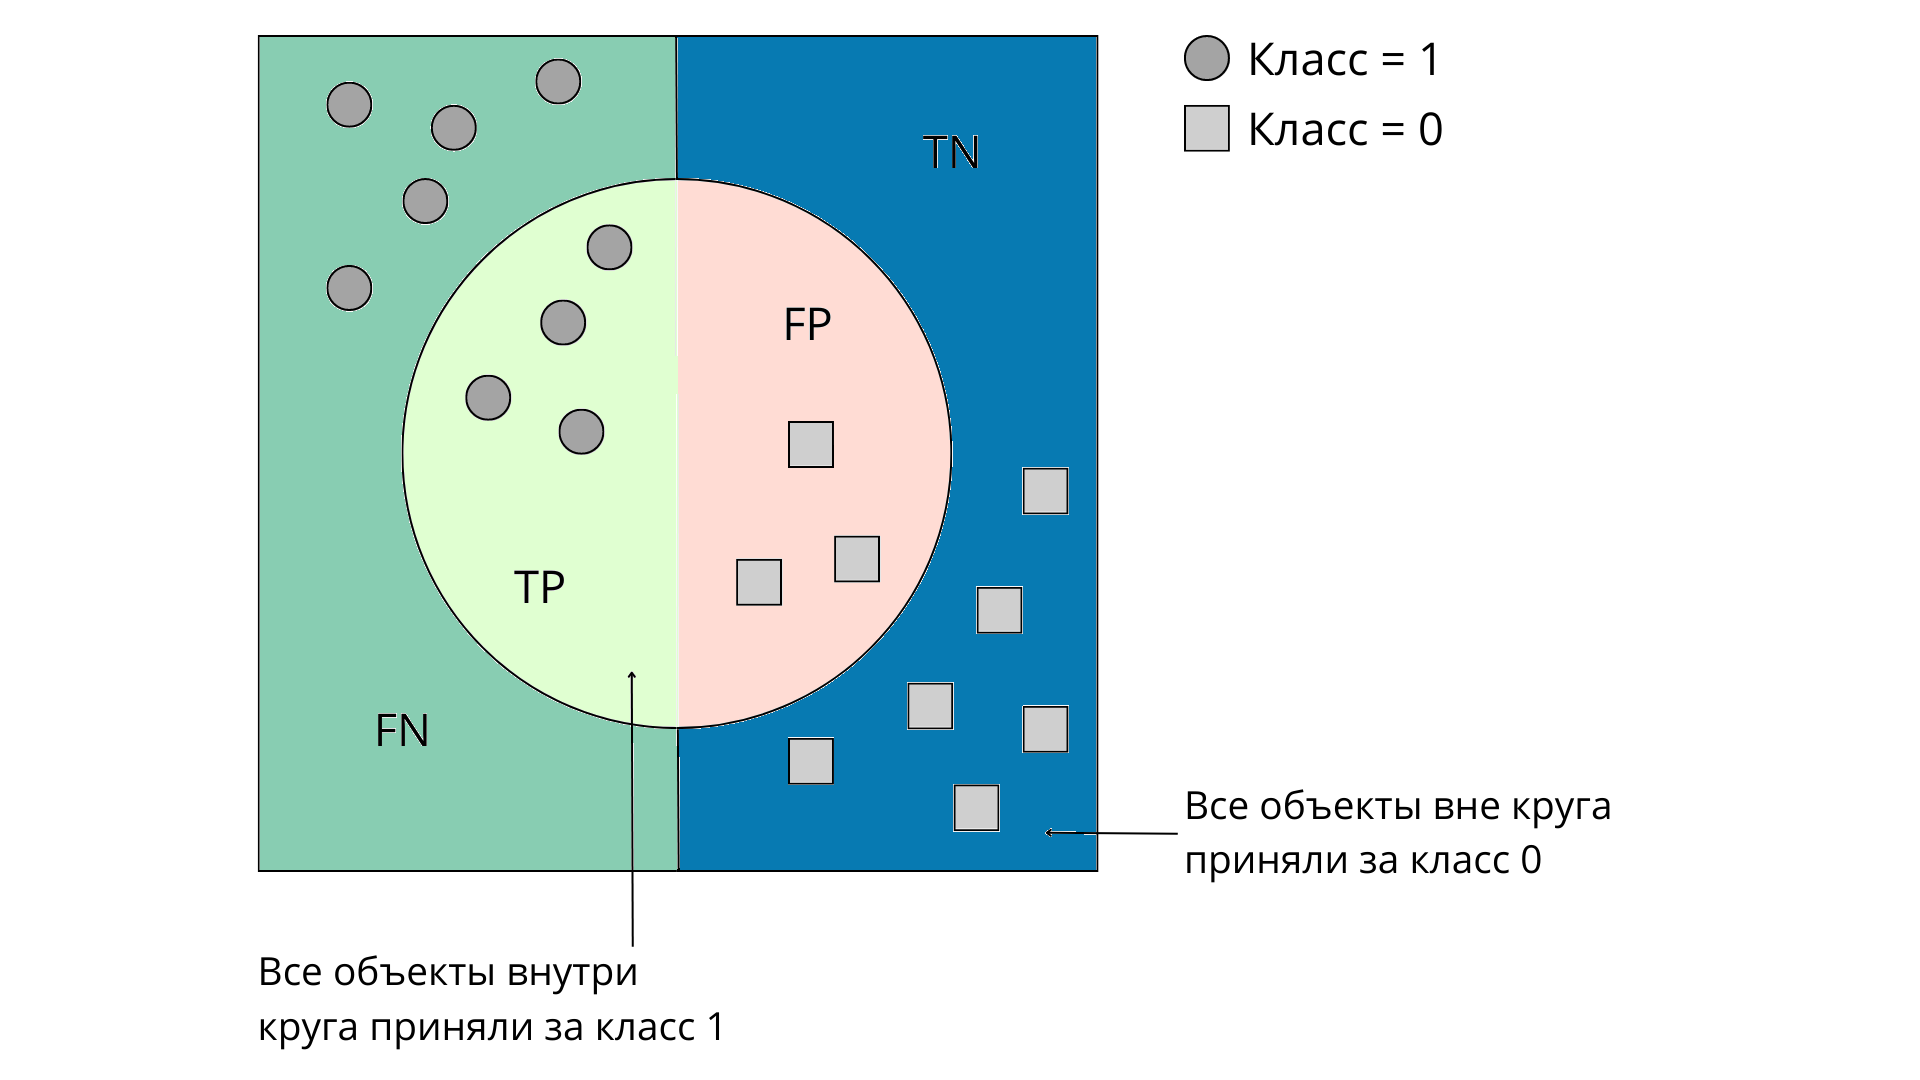

Формально матрица ошибок не является метрикой, но на её основе составляются сами метрики классификации. Давайте перейдём к ним.

## Accuracy (достоверность/аккуратность)

Accuracy (достоверность/аккуратность) — доля правильных ответов модели среди всех ответов. Правильные ответы — это истинно положительные (True Positive) и истинно отрицательные ответы (True Negative):

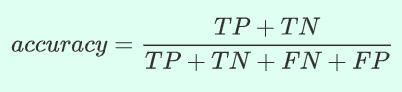

Accuracy — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. Она бесполезна, если классы сильно несбалансированы.

Примечание. Нередко в русской литературе вы можете встретить перевод метрики accuracy как «точность», однако так же на русский язык переводится метрика precision, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (accuracy или precision) идёт речь.

Интерпритация: Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Однако представим, что мы построили классификатор, который просто предсказывает все письма как «не спам», то есть True Negative = 100, False Negative = 10, True Positive = 0, False Positive = 0.

acuracy = (0+100)/(0+100+0+10) = 0.909

Метрика выросла, однако наша «модель» не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов, а именно к метрикам precision, recall и F-мера.

## PPV (Positive Predictive Value)

Precision (точность), или PPV (Positive Predictive Value) — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

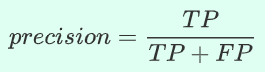

Интерпретация: (0-1) способность отделить класс 1 от класса 0. Чем больше precision, тем меньше ложных попаданий. То есть чем ближе precision к 1, тем меньше вероятность модели допустить ошибку I рода.

Precision нужен в задачах, где от нас требуется минимум ложных срабатываний. Чем выше «цена» ложноположительного результата, тем выше должен быть precision.

В предельном случае (когда precision равен 1) у модели отсутствуют ложноположительные срабатывания.

Примечание. Важно понимать, что данный вывод справедлив только для выборки, на которой мы оцениваем метрику, то есть это не означает, что модель вовсе не может допустить ложноположительных результатов. Однако чем больше выборка, на которой мы тестируем алгоритм, тем ближе к истине будет данный вывод.

## Recall (полнота), или TPR (True Positive Rate)

Recall (полнота), или TPR (True Positive Rate) — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

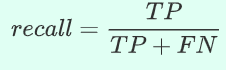

Интерпретация: (0-1) способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что метрика зависит от количества ложноотрицательных срабатываний. То есть чем ближе recall к 1, тем меньше вероятность модели допустить ошибку II рода.

Recall очень хорошо себя показывает в задачах, где важно найти как можно больше объектов, принадлежащих к классу 1.

Предельный случай (когда recall равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, с какой точностью мы это сделали.

Метрики precision и recall не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

Концентрация только на одной метрике (precision или recall) без учёта второй — сомнительная идея.

В битве за максимум precision для класса 1 побеждает модель, которая всегда будет говорить «нет». У неё вообще не будет ложноположительных срабатываний.

В битве за максимум recall для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1, и у неё не будет ложноотрицательных срабатываний. 

В реальности необходимо балансировать между двумя этими метриками.

Классическим примером является задача определения оттока клиентов.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью. 

## Fβ (F-мера)

Fβ (F-мера) — это взвешенное среднее гармоническое между precision и recall:

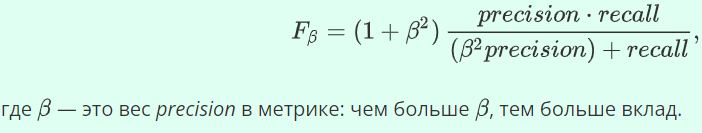

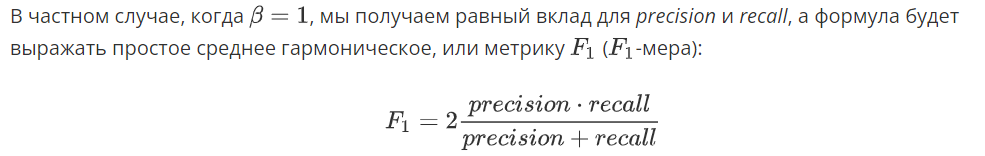

В чём преимущество F1-меры?

Метрика равна своему максимуму (1), если и precision, и recall равны 1 (то есть когда отсутствуют как ложноположительные, так и ложноотрицательные срабатывания). Но если хотя бы одна из метрик будет близка к 0, то и F1 будет близка к 0. 

Несмотря на отсутствие бизнес-интерпретации, метрика F1 является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между precision и recall.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов. 

Примечание. Ещё одно небольшое, но очень важное замечание: все суждения, которые мы привели по отношению к precision, recall и F-мере, относятся только к классу 1, так как эти метрики по умолчанию считаются для класса 1. Для решения большинства задач знания о значении этих метрик для класса 1 более чем достаточно, так как обычно нас интересует именно наличие некоторого эффекта.

Однако если вам по каким-то причинам необходимо рассчитать precision, recall и F-меру для класса 0, для этого достаточно сделать перекодировку классов — поменять их обозначения местами или (при расчёте метрик с помощью библиотеки sklearn) изменить значение специального параметра pos_label на 0.

Общая информация по метрикам в таблице

3.4

Пусть мы по снимкам с беспилотника хотим классифицировать растения на больные (класс 1) и здоровые (класс 0). Считается, что болезнь растений считается незаразной.

Для решения задачи были обучены две модели. Их метрики для класса 1 составили:

Для первой модели: precision = 0.78, recall = 0.51.
Для второй модели: precision = 0.61, recall = 0.81.

Так как количество ресурсов сильно ограничено, нам необходимо уменьшить число ложных срабатываний. За это отвечает метрика precision. Таким образом, мы выберем ту модель, у которой наибольший precision, — это первая модель.

3.5 

Мы получили большой грант от государства на закупку химикатов. Теперь наша цель — сохранить как можно больший урожай.

Какую модель выберем?

Если мы хотим сохранить как можно больший урожай, мы выберем ту модель, у которой больше способность находить больные растения. За это отвечает метрика recall. Таким образом, мы выберем ту модель, у которой наибольший recall, — это вторая модель.

# РАСЧЁТ МЕТРИК НА PYTHON

ноутбук приложен


# Задания

3.6 У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики precision.

Ответ округлите до сотых.

Пример ввода ответа: 0.12

percision = true_positive/(true_positive+false_positive)

In [1]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

In [4]:
percision = 3/(3+1)
display(round(percision, 2))

0.75

3.7 У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики recall.

Ответ округлите до сотых.

Пример ввода ответа: 0.12

recall = true_positive/(true_positive+false_negative)

In [5]:
recall = 3/(3+2)
display(round(recall, 2))

0.6

3.8 У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики F1.

Ответ округлите до сотых.

F1 = 2*(percision*recall)/(percision+recall)

In [7]:
F1 = 2*(percision*recall)/(percision+recall)
display(f'{F1:.2f}')

'0.67'